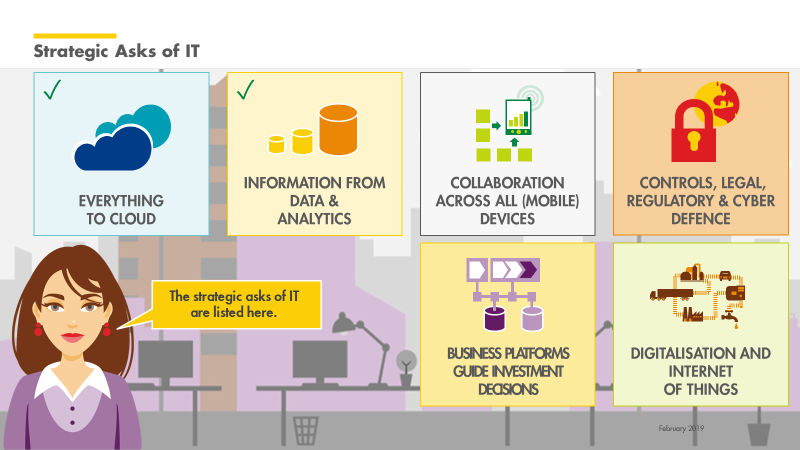

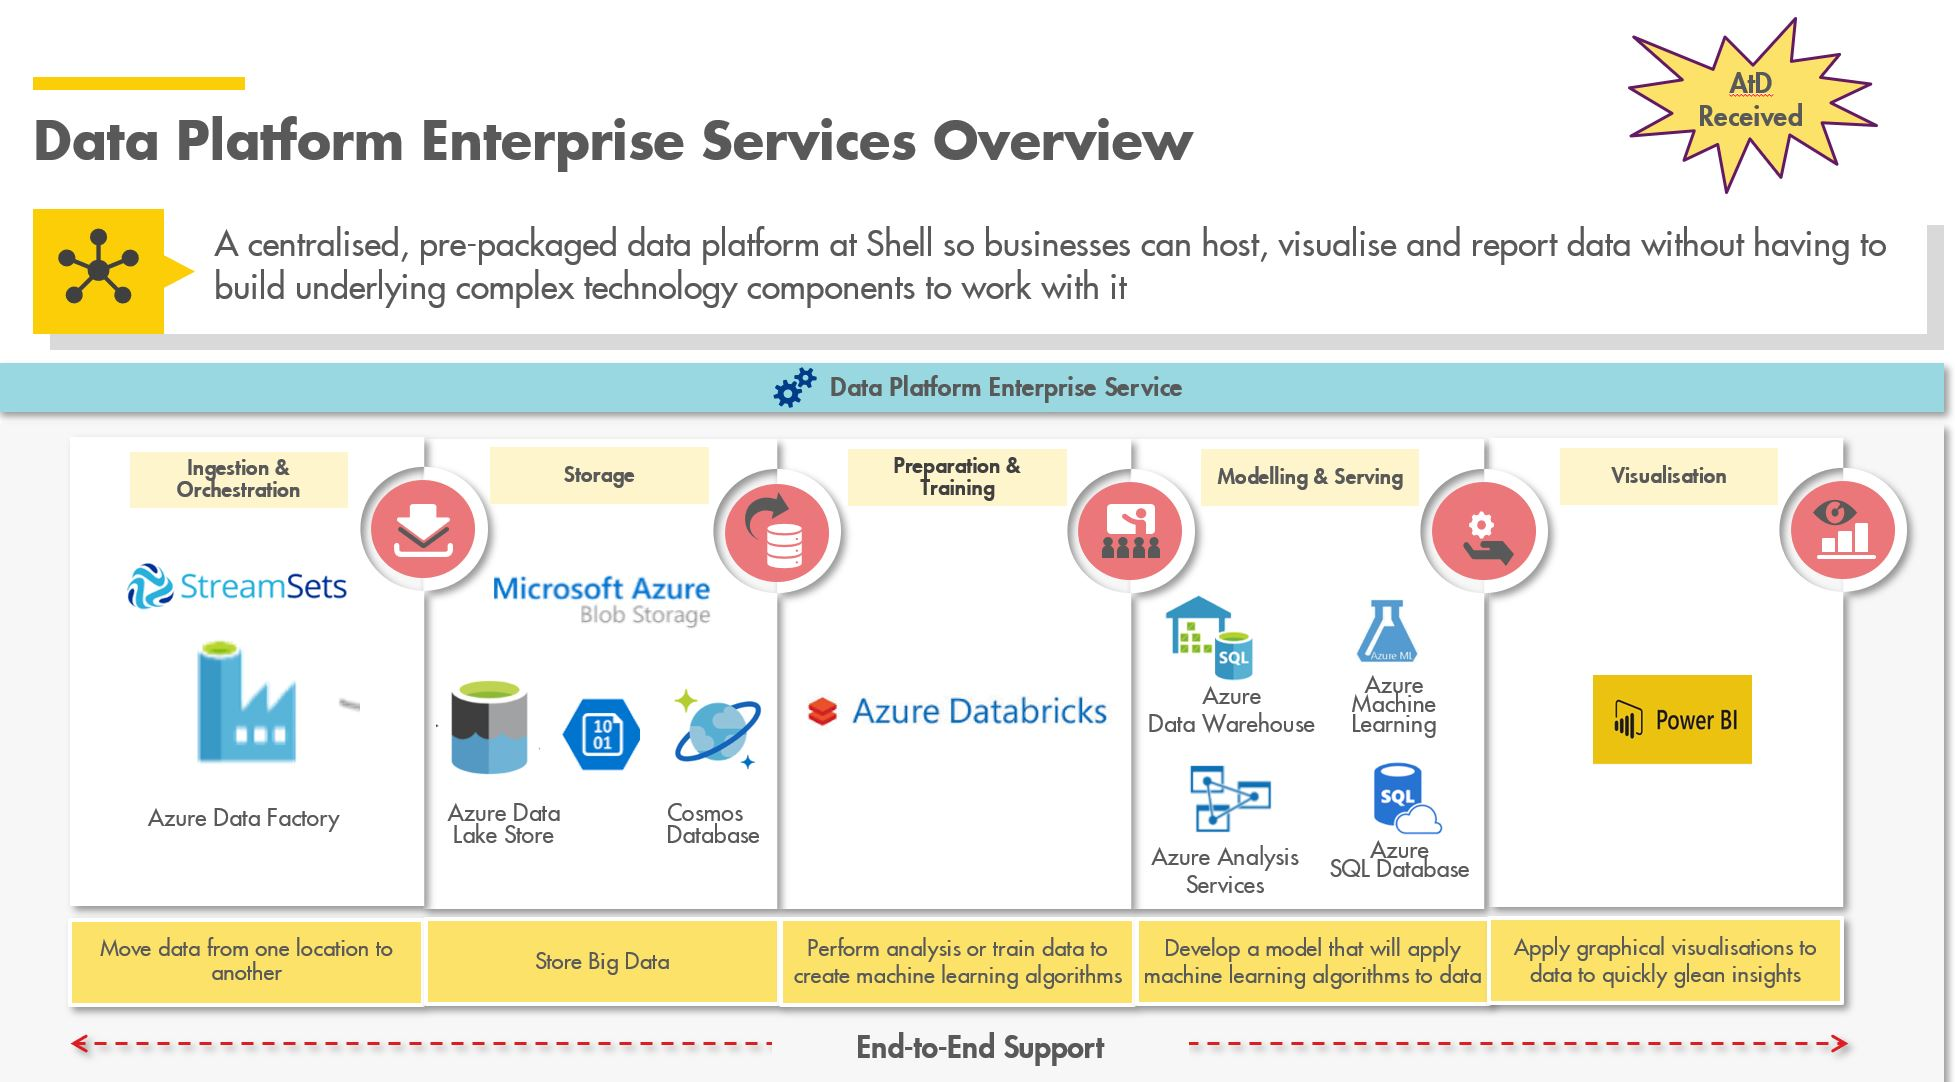

In this data engineering example we will analyze how  profits and revenue numbers have changed for Fortune 500 US companies between 1955 – 2005. 

In [3]:
%%capture

#PIP is a recursive acronym that stands for “PIP Installs Packages” or “Preferred Installer Program”. 
#It's a command-line utility that allows you to install, reinstall, or uninstall Python Package Index (PyPI) packages with a simple and straightforward command.
!pip install --upgrade pip 
!pip install seaborn 

#Pandas to work with our data it's name is derived from "Panel Data" an econometrics term for multidimensional structured data sets.
import pandas as pd 

#Matplotlib is a Python 2D plotting library which can generate plots, histograms, power spectra, bar charts, errorcharts, scatterplots etc with just a few lines of code.
import matplotlib.pyplot as plt 

#Seaborn is a Python data visualization library based on matplotlib. 
#It provides a high-level interface for drawing attractive and informative statistical graphics. 
import seaborn as sns 

#There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. 
#They are each suited to different applications and personal preferences. The default theme is darkgrid.
sns.set(style="darkgrid") 

In [2]:
#Pandas is an open source and takes data (like a CSV or TSV file, or a SQL database) to create a Python object with rows and columns called data frame. 
#Let's go ahead and load our data.
#df --> data frame
#pd --> Pandas which we imported in the previous step
#read_csv --> function which takes the data file to be read as an argument for loading data into data frame

df = pd.read_csv('fortune500.csv')


In [3]:
#The head() function picks up the first 5 records of the data frame by default. 
#This is used to do a sample check on the data we have loaded into data frame.
df.head()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


In [4]:
#The tail() function picks up the last 5 records of the data frame by default. 
#This is used to do a sample check on the data we have loaded into data frame.
df.tail()

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
25495,2005,496,Wm. Wrigley Jr.,3648.6,493
25496,2005,497,Peabody Energy,3631.6,175.4
25497,2005,498,Wendy's International,3630.4,57.8
25498,2005,499,Kindred Healthcare,3616.6,70.6
25499,2005,500,Cincinnati Financial,3614.0,584


In [5]:
#Looking good. We have the columns we need, and each row corresponds to a single company in a single year. 
#Let's just rename those columns so we can refer to them later.
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']


In [6]:
#Next, we need to explore our data set. Is it complete? Did pandas read it as expected? Are any values missing? 
#There are 500 companies spread across 51 years so We are expecting a value of 25500 records. 
len(df)

25500

In [7]:
#Let's check whether our data set has been imported as we would expect. 
#A simple check is to see if the data types (or dtypes) have been correctly interpreted.
df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit      object
dtype: object

In [8]:
# It looks like there's something wrong with the profits column — we would expect it to be a float64 like the revenue column. 
#This indicates that it probably contains some non-integer values, so let's take a look.
# Using the regular expression checking if "Profit" column contains any non numeric data in the data frame which we loaded
non_numeric_profits = df.profit.str.contains('[^0-9.-]')

#Show top records from the data set returned after checking for non numerica data in previous step
df.loc[non_numeric_profits].head()

,year,rank,company,revenue,profit
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.


In [9]:
#A Set is an unordered collection data type that is iterable, mutable, and has no duplicate elements. 
#It has a highly optimized method for checking whether a specific element is contained in the set. This is based on a data structure known as a hash table.
set(df.profit[non_numeric_profits])

{'N.A.'}

In [10]:
#The len function returns the length of the string.
#In our case we want to see how many records have non numeric data in the "profit" column of data frame "df" which we loaded.
len(df.profit[non_numeric_profits])

369

It's a small fraction of our data set, though not completely inconsequential as it is still around 1.5%. If rows containing N.A. are, roughly, uniformly distributed over the years, the easiest solution would just be to remove them. So let's have a quick look at the distribution.

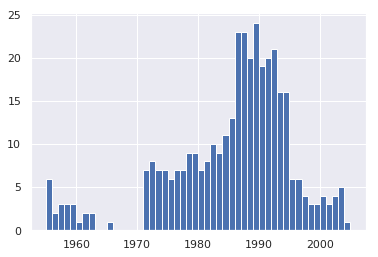

In [11]:
#369 records is a small fraction of 25500 records data set, though not completely inconsequential as it is still around 1.5%. 
#If rows containing N.A. are roughly, uniformly distributed over the years, the easiest solution would just be to remove them. 
#A histogram is an accurate graphical representation of the distribution of numerical data. 
#To construct a histogram, the first step is to “bin” the range of values — that is, divide the entire range of values into a series of intervals — and then count how many values fall into each interval.

bin_sizes, _, _ = plt.hist(df.year[non_numeric_profits], bins=range(1955, 2006))

At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. For our purposes, let's say this is acceptable and go ahead and remove these rows.

In [12]:
# At a glance, we can see that the most invalid values in a single year is fewer than 25, and as there are 500 data points per year, removing these values would account for less than 4% of the data for the worst years. 
# Indeed, other than a surge around the 90s, most years have fewer than half the missing values of the peak. 
#For our purposes, let's say this is acceptable and go ahead and remove these rows.

df = df.loc[~non_numeric_profits]
df.profit = df.profit.apply(pd.to_numeric)

In [13]:
# Check if 369 records which had "NA" values in "Profit" column has been removed

len(df)

25131

In [14]:
# Check the data types of all the columns in the data frame to see if "Profit" columns data type is "Object" or "float64"

df.dtypes

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

In [15]:
# Plot average profit by year and set the values required. Mean is the sum of data divided by the number of data-points.

group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y = avgs.profit

In [16]:
# Define the plot by setting X axis, Y axis and title

def plot(x, y, ax, title, y_label):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.plot(x, y)
    ax.margins(x=0, y=0)

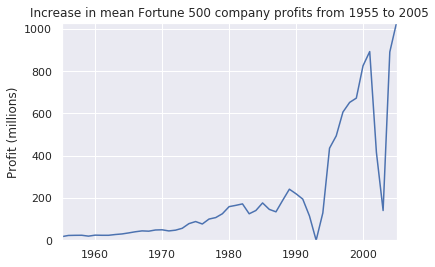

In [17]:
# Draw the sub plot on profits for fortune 500 companies from 1955 to 2005

fig, ax = plt.subplots()
plot(x, y, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

Wow, that looks like an exponential, but it's got some huge dips. They must correspond to the early 1990s recession and the dot-com bubble. It's pretty interesting to see that in the data. But how come profits recovered to even higher levels post each recession?
Maybe the revenues can tell us more.

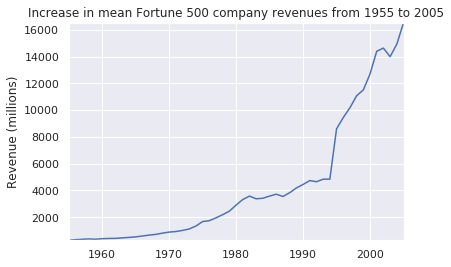

In [18]:
# Draw the sub plot on revenues for fortune 500 companies from 1955 to 2005

y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

That adds another side to the story. Revenues were no way nearly as badly hit, that's some great accounting work from the finance departments.

In [19]:
# Standard deviation is a number used to tell how measurements for a group are spread out from the average (mean), or expected value. A low standard deviation means that most of the numbers are close to the average. 
# A high standard deviation means that the numbers are more spread out.
# Define values required to plot standard deviation graphs for both Profit and Revenue.

def plot_with_std(x, y, stds, ax, title, y_label):
    ax.fill_between(x, y - stds, y + stds, alpha=0.2)
    plot(x, y, ax, title, y_label)
    

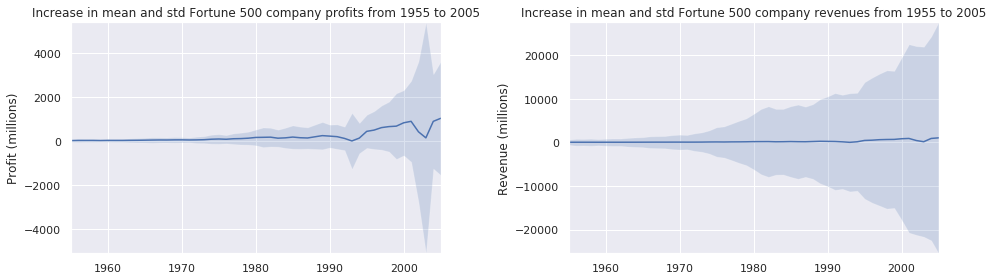

In [20]:
    import warnings
    warnings.simplefilter('ignore')
    fig, (ax1, ax2) = plt.subplots(ncols=2)
    title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
    stds1 = group_by_year.std().profit.as_matrix()
    stds2 = group_by_year.std().revenue.as_matrix()
    plot_with_std(x, y.as_matrix(), stds1, ax1, title % 'profits', 'Profit (millions)')
    plot_with_std(x, y.as_matrix(), stds2, ax2, title % 'revenues', 'Revenue (millions)')
    fig.set_size_inches(14, 4)
    fig.tight_layout()

That's staggering, the standard deviations are huge. Some Fortune 500 companies make billions while others lose billions, and the risk has increased along with rising profits over the years. Perhaps some companies perform better than others; are the profits of the top 10% more or less volatile than the bottom 10%?
There are plenty of questions that we could look into next, and it's easy to see how the flow of working in a notebook matches one's own thought process, so now it's time to draw this example to a close. 
This flow helped us to easily investigate our data set in one place without context switching between applications, and our work is immediately sharable and reproducible. 
If we wished to create a more concise report for a particular audience, we could quickly refactor our work by merging cells and removing intermediary code.
